In [27]:
data = pd.read_csv('212_fallzeit.csv')
data['Dichte'] += 0.025 
data

,Kugeldurchmesser,Fallstrecke,Fallzeit 1,Fallzeit 2,Fallzeit 3,Fallzeit 4,Fallzeit 5,Dichte
0,9.000,200,6.28,6.07,6.15,6.14,6.12,1.385
1,8.000,200,7.82,7.58,7.50,7.72,7.50,1.380
2,7.144,200,8.45,8.26,8.58,8.29,8.51,1.400
3,6.000,200,11.39,11.39,11.32,11.21,11.39,1.400
4,5.000,200,15.23,15.32,15.54,15.58,15.53,1.400
5,4.000,100,12.32,12.00,12.06,12.36,12.15,1.400
6,3.000,50,10.39,10.20,10.29,10.06,10.28,1.400
7,2.000,50,20.39,20.51,20.51,19.73,19.34,1.400
8,1.500,50,33.93,34.04,34.82,34.48,33.89,1.415


In [107]:
v = pd.DataFrame([data.iloc[:,1]/i[1] for i in list(data.loc[:,'Fallzeit 1':'Fallzeit 5'].iteritems())]).transpose()
vm = v.mean(axis=1)

ds = data['Kugeldurchmesser']/2

dt = 0.2

dv = sqrt(((dt/data.loc[:,'Fallzeit 1':'Fallzeit 5'])**2).add((ds/data['Fallstrecke'])**2, axis=0))
dv.columns = v.columns
dv *= v

dvm = sqrt((dv**2).sum(axis=1))/sqrt(5)

r_f = 1.1466
dr_f = 0.0002

dr_k = 0.0025

vs,r_fs,r_ks = sm.symbols('v \\rho_f \\rho_k')
dvs,dr_fs,dr_ks = sm.symbols('dv d\\rho_f d\\rho_k')
f = vs/(r_ks - r_fs)

import fehler
f_abs, f_rel = fehler.fehler(f, vs, r_fs, r_ks)

y = [f.subs([(vs, vm[i]), (r_fs, r_f), (r_ks, data['Dichte'][i])]) for i in range(9)]
dy = [f_abs.subs([(vs, vm[i]), (r_fs, r_f), (r_ks, data['Dichte'][i]), (dvs, dvm[i]), (dr_fs, dr_f), (dr_ks, dr_k)]) for i in range(9)]

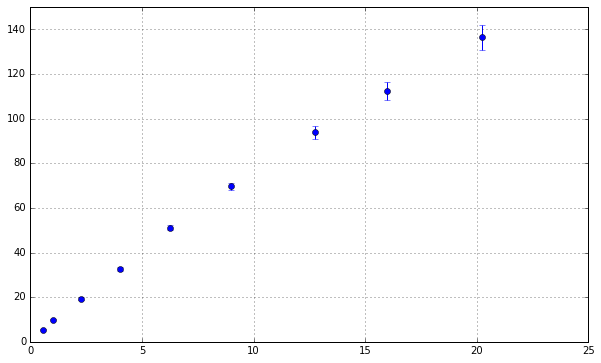

In [115]:
figure(figsize=(10,6))
errorbar((data['Kugeldurchmesser']/2)**2, y, yerr=dy, fmt='o')
xlim(0, 25)
ylim(0, 150)
grid()
show()